# Environment

In [69]:
import pandas as pd
import yaml
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
CONFIG_PATH = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"

# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 2

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/NSC/broad/cpg_enrichment_2_rep_in_cpg/cpg_enrichment_parallel.csv


# Load Data

In [70]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [71]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (12725, 32)

First few rows:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3671654,3672156,502,613,CpG:,13.596750,18.921372,0.718592,1.0,both,exo_only,False,3,3,3,3,"3.061797170525053,5.682240710315476,32.046211683417695","35.88782899408226,18.74866663412269,2.1276208831969488",1,0,5.54931;6.06037,NaN,3671654,3672156,502,13.089529,13.783088,0.962695,0.728440,2,0
1,chr1,4491701,4493673,1972,619,CpG:,7.108247,7.530761,0.943895,1.0,both,exo_only,False,2,2,3,3,"12.19944750513073,0.0,9.125292064210223","0.0,19.079104030833523,3.513177480949108",1,0,6.0982;5.8282,4.1282,4491701,4493673,1972,5.180604,8.290910,0.728816,1.100939,2,1
2,chr1,4571641,4572075,434,619,CpG:,29.865143,0.137681,216.916069,0.5,exo_only,exo_only,False,3,1,3,3,"16.923790716355846,19.305170516264603,53.36646880312449","0.4130419223539291,0.0,0.0",1,0,4.35039;6.82732;3.40697,NaN,4571641,4572075,434,16.646360,0.194710,0.557384,1.414214,3,0
3,chr1,4785376,4785814,438,621,CpG:,64.392939,62.625671,1.028220,1.0,both,both,False,3,3,3,3,"79.64513432054216,90.87383952206129,22.65984181617493","109.42149067360516,56.15474365617587,22.300778912082656",1,1,2.96862;6.6373;7.27926,12.2007;6.57158;5.01142,4785376,4785814,438,29.863684,35.859999,0.463773,0.572609,3,3
4,chr1,4807559,4808103,544,621,CpG:,36.356446,11.776893,3.087100,0.7,both,exo_only,False,3,3,3,3,"35.17831939809463,5.216560994877534,68.67445693997776","6.757579873589909,7.732353210449219,20.84074580494095",1,1,4.55161;7.91139;6.13029,3.25084,4807559,4808103,544,25.919968,6.421455,0.712940,0.545259,3,1



Column names:
['chr', 'start', 'end', 'cpg_length', 'cpg_name', 'cpg_score', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'total_exo_replicates', 'total_endo_replicates', 'exo_replicate_signals', 'endo_replicate_signals', 'n_exo_peaks', 'n_endo_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'analysis_start', 'analysis_end', 'analysis_length', 'exo_signal_std', 'endo_signal_std', 'exo_signal_cv', 'endo_signal_cv', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks']


**Columns explanation:**

1. Signal vs Peaks columns:

- `endo_replicates_with_signal`: Counts how many replicates have a non-zero signal value when measuring the bigWig signal in the region. This is calculated using `pyBigWig.stats()` to get the mean signal value in the region.
- `endo_replicates_with_peaks`: Counts how many replicates have an overlapping peak in the broadPeak files.

It's possible to have `endo_replicates_with_peaks=0` but `endo_replicates_with_signal=2` because:
- Peaks represent regions that passed the peak caller's statistical threshold for significance
- Signal values represent the raw enrichment data before any statistical filtering
- So you can have detectable signal in a region that wasn't strong/consistent enough to be called as a peak

2. Scores vs Signals:

- `endo_peak_scores_by_rep`: Contains the `signalValue` scores from the broadPeak files for each replicate that has a peak overlapping the region. These scores are peak caller-specific enrichment metrics.
- `endo_replicate_signals`: Contains the actual signal values extracted from the bigWig files for each replicate in that region. These are the raw signal values.

`endo_peak_scores_by_rep` is NaN when there are no peaks overlapping the region in any replicate (`endo_replicates_with_peaks=0`). This makes sense because if there are no peaks, there are no peak scores to report.

So in summary:
- Signal columns reflect raw data from bigWig files
- Peak columns reflect statistically significant regions called by the peak caller
- You can have signal without peaks (but not vice versa)
- Peak scores are only available when peaks are present

**Handling multiple replicates:**

1. For Signals (from bigWig files):
- Each replicate's signal is obtained independently using `get_signal_from_bigwig()`
- The signals are stored as individual values in `endo_replicate_signals` as a comma-separated string
- The final `endo_signal` used for enrichment calculations is the mean across all replicates

2. For Peak Scores:
- Peak scores are stored in `endo_peak_scores_by_rep` using a specific format:
  - Scores from different peaks within the same replicate are comma-separated
  - Different replicates are semicolon-separated
  - If a replicate has no peaks, it's simply not included in the string
- There's no averaging of peak scores

For example:
- If replicate 1 has two peaks with scores 5.0 and 6.0, and replicate 2 has one peak with score 4.0, while replicate 3 has no peaks:
  - `endo_peak_scores_by_rep` would be: `"5.0, 6.0; 4.0"`
  - `endo_replicates_with_peaks` would be `2`
  - If all replicates had signals of `2.0`, `3.0`, and `1.0`:
    - `endo_replicate_signals` would be `"2.0, 3.0, 1.0"`
    - `endo_signal` would be `2.0` (the mean)
    - `endo_replicates_with_signal` would be `3`

In [72]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [73]:
# Split data based on binding type
exo_only_df = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df)}")
print(f"Number of CpG islands bound by both: {len(both_df)}")


Number of CpG islands bound by exo only: 638
Number of CpG islands bound by endo only: 353
Number of CpG islands bound by both: 11734


## By peaks number

Minimum 2 replicates with peaks

In [74]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 2135
Number of CpG islands bound by endo only: 826
Number of CpG islands bound by both: 9764


# Data analysis

## Both: enrichment distribution (selected by the signal value)

In [75]:
# Print summary statistics of enrichment values
print("Summary statistics of enrichment values:")
print(both_df['enrichment'].describe())

Summary statistics of enrichment values:
count    11734.000000
mean         2.427418
std          5.616776
min          0.006678
25%          0.965196
50%          1.490519
75%          2.422003
max        303.383990
Name: enrichment, dtype: float64


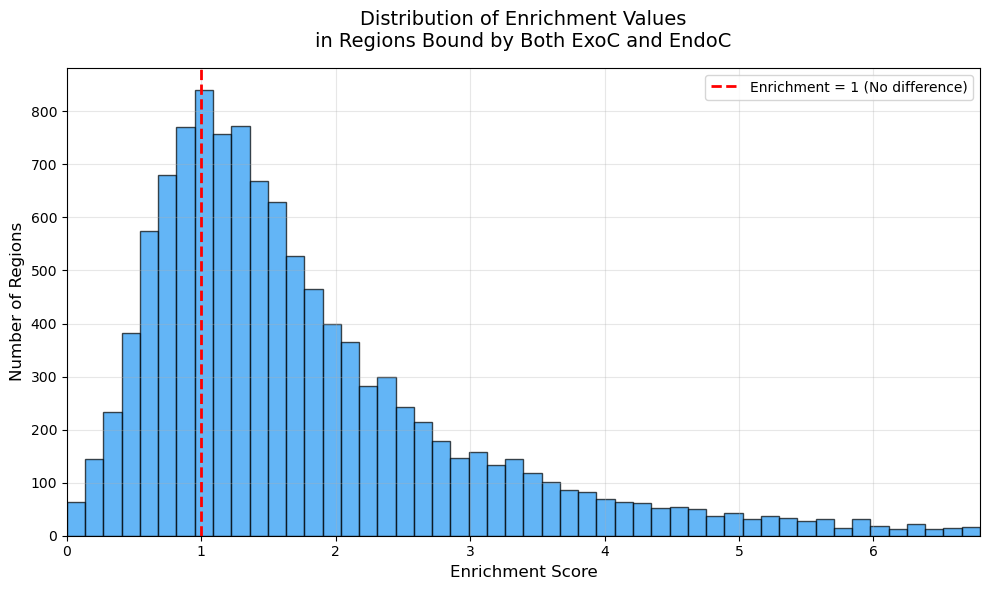

In [76]:
# Create histogram of enrichment values for regions bound by both
plt.figure(figsize=(10, 6))

# Plot histogram with better binning and transparency
# Calculate reasonable range based on data distribution
q1, q3 = both_df['enrichment'].quantile([0.25, 0.75])
factor = 3
iqr = q3 - q1
range_min = max(0, q1 - factor * iqr)  # Don't go below 0 for enrichment
range_max = q3 + factor * iqr

# Plot histogram and get the axis object
n, bins, patches = plt.hist(both_df['enrichment'], bins=50, edgecolor='black', alpha=0.7,
                          color='#2196F3', density=False, range=(range_min, range_max))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Improve axis labels and title
plt.xlabel('Enrichment Score', fontsize=12)
plt.ylabel('Number of Regions', fontsize=12)
plt.title('Distribution of Enrichment Values\nin Regions Bound by Both ExoC and EndoC',
          fontsize=14, pad=15)

# Add vertical line at enrichment = 1
plt.axvline(x=1, color='red', linestyle='--', linewidth=2,
            label='Enrichment = 1 (No difference)')

# Set x-axis limits based on the actual data range
plt.xlim(range_min, range_max)

# Add legend with better positioning
plt.legend(loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


## Enrichment outliers

In [77]:
# Find outliers (values > range_max)
outliers_df = both_df[both_df['enrichment'] > range_max].copy()
print(f"\nNumber of outliers (enrichment > {range_max}):", len(outliers_df))


Number of outliers (enrichment > 6.792424132898567): 533


In [78]:
outliers_df.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
11374,chr8,84638667,84638870,203,1230,CpG:,73.499867,0.242267,303.383990,0.2,both,exo_only,False,3,2,3,3,"68.39530895966027,28.052704905054252,124.05158695916236","0.7001379229165063,0.0,0.02666246303783849",1,0,5.19068;5.80735;4.31003,6.68317,84638667,84638870,203,39.357242,0.323947,0.535474,1.337149,3,1
11501,chr8,105605286,105605677,391,1390,CpG:,32.559190,0.215043,151.407607,0.2,both,exo_only,False,3,2,3,3,"48.06176517808529,5.741712797023451,43.87409305816416","0.0,0.5528452792740843,0.09228460014323749",1,0,6.03285;6.77288;6.82641,6.21096,105605286,105605677,391,19.039730,0.241815,0.584773,1.124495,3,1
5220,chr17,57105296,57105796,500,1020,CpG:,55.504278,0.386726,143.523377,0.2,both,exo_only,False,3,2,3,3,"32.410447860717774,49.39609769058227,84.70628746032715","0.0,0.46737918853759763,0.6927999877929687",1,1,7.45714;4.31357;5.16239,2.34948,57105296,57105796,500,21.782196,0.288527,0.392442,0.746075,3,1
8427,chr4,137993957,137994345,388,1637,CpG:,81.131400,0.587051,138.201699,0.2,both,exo_only,False,3,2,3,3,"139.42613884345772,17.203281960536525,86.76477904172287","0.9009210796085829,0.0,0.8602309273075812",1,0,8.9891;6.73221;7.45537,NaN,137993957,137994345,388,50.056021,0.415440,0.616975,0.707673,3,0
9303,chr5,138441448,138441854,406,1641,CpG:,82.176841,0.621690,132.182948,0.2,both,exo_only,False,3,2,3,3,"59.582037333784434,105.81387818623058,81.1346062674311","1.778732317421824,0.08633822408215754,0.0",1,0,10.5882;5.74697;8.3099,NaN,138441448,138441854,406,18.888453,0.818911,0.229851,1.317234,3,0


In [79]:
# Print first 10 and last 10 outliers sorted by enrichment value
print("\nFirst 10 outliers:")
for _, row in outliers_df[:10].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 10 outliers:")
for _, row in outliers_df[-10:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 10 outliers:
chr8:84,638,667-84,638,870                        enrichment: 303.3839897241441
chr8:105,605,286-105,605,677                      enrichment: 151.40760666905524
chr17:57,105,296-57,105,796                       enrichment: 143.52337674106226
chr4:137,993,957-137,994,345                      enrichment: 138.20169916616592
chr5:138,441,448-138,441,854                      enrichment: 132.18294766944598
chr7:38,174,291-38,174,496                        enrichment: 108.64477885823295
chr2:13,793,075-13,793,793                        enrichment: 106.97546471052785
chr2:29,619,879-29,620,185                        enrichment: 98.46285644555203
chr5:19,227,392-19,227,747                        enrichment: 90.67412596552003
chr2:26,122,249-26,123,011                        enrichment: 85.42915713120696

Last 10 outliers:
chr10:13,868,752-13,869,155                       enrichment: 6.89105685935453
chr9:111,117,912-111,118,651                      enrichment: 6.887325928017

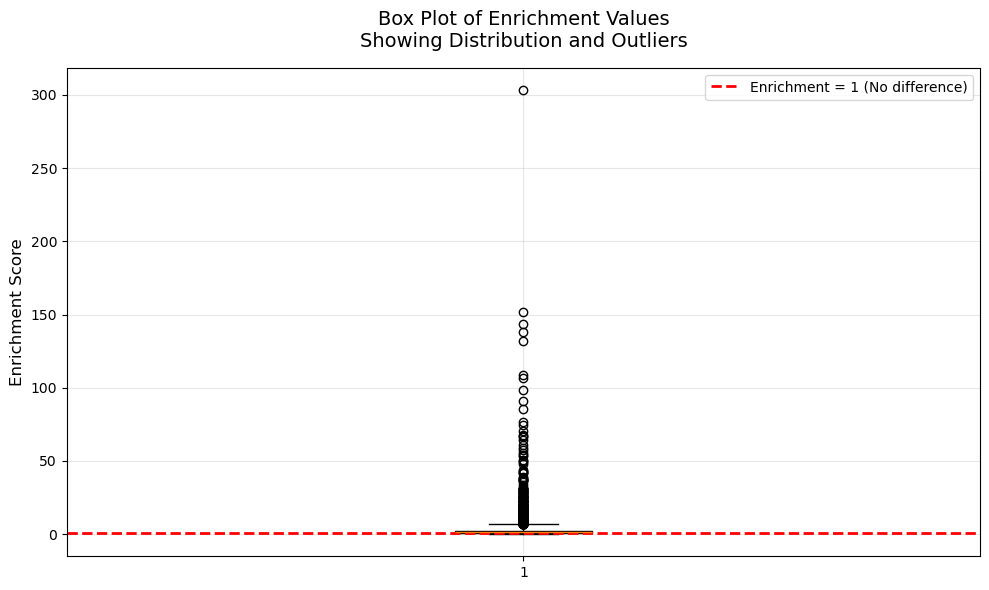

In [80]:
# Create box plot to visualize distribution and outliers
plt.figure(figsize=(10, 6))
# The whis parameter controls the whisker length in the boxplot
# whis=factor means whiskers extend to points within factor * IQR of Q1/Q3
# Points beyond the whiskers are considered outliers and plotted individually
plt.boxplot(both_df['enrichment'], whis=factor)
plt.ylabel('Enrichment Score', fontsize=12)
plt.title('Box Plot of Enrichment Values\nShowing Distribution and Outliers',
          fontsize=14, pad=15)
plt.grid(True, alpha=0.3)

# Add horizontal line at enrichment = 1
plt.axhline(y=1, color='red', linestyle='--', linewidth=2,
            label='Enrichment = 1 (No difference)')

plt.legend()
plt.tight_layout()
plt.show()

In [81]:
outliers_df["endo_replicates_with_peaks"].value_counts()

endo_zero_peaks  = outliers_df[outliers_df["endo_replicates_with_peaks"] == 0]
endo_one_peaks   = outliers_df[outliers_df["endo_replicates_with_peaks"] == 1]
endo_two_peaks   = outliers_df[outliers_df["endo_replicates_with_peaks"] == 2]
endo_three_peaks = outliers_df[outliers_df["endo_replicates_with_peaks"] == 3]

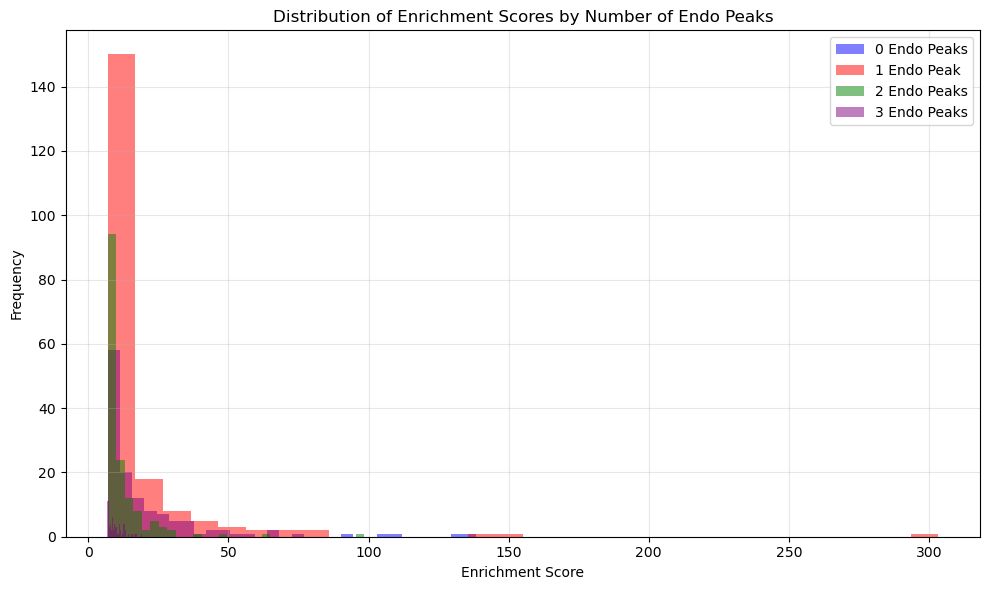

In [82]:
plt.figure(figsize=(10, 6))

# Plot overlapping histograms with transparency
plt.hist(endo_zero_peaks['enrichment'], bins=30, alpha=0.5, label='0 Endo Peaks', color='blue')
plt.hist(endo_one_peaks['enrichment'], bins=30, alpha=0.5, label='1 Endo Peak', color='red')
plt.hist(endo_two_peaks['enrichment'], bins=30, alpha=0.5, label='2 Endo Peaks', color='green')
plt.hist(endo_three_peaks['enrichment'], bins=30, alpha=0.5, label='3 Endo Peaks', color='purple')

plt.xlabel('Enrichment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Scores by Number of Endo Peaks')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [83]:
print("top enrichment values for endo_two_peaks")
endo_two_peaks["enrichment"][:10]

top enrichment values for endo_two_peaks


6311     98.462856
11874    64.177454
5307     47.550001
11964    38.144801
6851     28.619539
5731     28.544270
11384    27.758838
9660     26.145963
10344    25.408269
556      24.648400
Name: enrichment, dtype: float64

In [85]:
# Print first 10 and last 10 endo_two_peaks sorted by enrichment value
print("\nFirst 10 endo_two_peaks:")
for _, row in endo_two_peaks[:10].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + 
          f"enrichment: {row['enrichment']:<10.2f}" +
          f"cpg_length: {row['cpg_length']}")

print("\nLast 10 endo_two_peaks:")
for _, row in endo_two_peaks[-10:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + 
          f"enrichment: {row['enrichment']:<10.2f}" +
          f"cpg_length: {row['cpg_length']}")


First 10 endo_two_peaks:
chr2:29,619,879-29,620,185                        enrichment: 98.46     cpg_length: 306
chr9:44,134,631-44,135,365                        enrichment: 64.18     cpg_length: 734
chr17:83,215,491-83,215,722                       enrichment: 47.55     cpg_length: 231
chr9:56,864,984-56,865,213                        enrichment: 38.14     cpg_length: 229
chr2:132,029,074-132,029,328                      enrichment: 28.62     cpg_length: 254
chr19:4,476,634-4,477,151                         enrichment: 28.54     cpg_length: 517
chr8:84,784,221-84,785,041                        enrichment: 27.76     cpg_length: 820
chr6:72,189,130-72,189,353                        enrichment: 26.15     cpg_length: 223
chr7:35,334,211-35,335,129                        enrichment: 25.41     cpg_length: 918
chr1:165,281,918-165,282,567                      enrichment: 24.65     cpg_length: 649

Last 10 endo_two_peaks:
chr2:106,003,104-106,003,389                      enrichment: 7.15   

## Regions length distribution

### CpG length - defined by the CpG coordinates

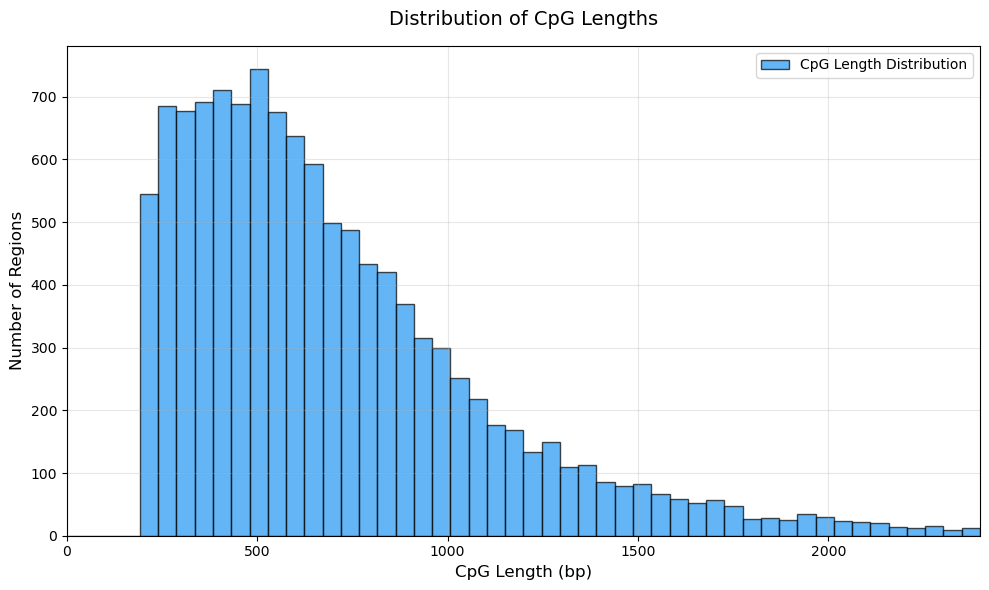

In [86]:
plt.figure(figsize=(10, 6))

# Calculate reasonable range based on data distribution
q1, q3 = both_df['cpg_length'].quantile([0.25, 0.75])
factor = 3
iqr = q3 - q1
range_min = max(0, q1 - factor * iqr)  # Don't go below 0 for cpg_length
range_max = q3 + factor * iqr

n, bins, patches = plt.hist(both_df['cpg_length'], bins=50, edgecolor='black', alpha=0.7,
                          color='#2196F3', density=False, range=(range_min, range_max),
                          label='CpG Length Distribution')

plt.grid(True, alpha=0.3)

plt.xlabel('CpG Length (bp)', fontsize=12)
plt.ylabel('Number of Regions', fontsize=12)
plt.title('Distribution of CpG Lengths',
          fontsize=14, pad=15)

plt.xlim(range_min, range_max)

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [87]:
both_df_sorted_by_cpg_length = both_df.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
11440,chr8,92355697,92360826,5129,1289,CpG:,66.879172,45.564788,1.467782,0.400000,both,both,False,3,3,3,3,"87.88468541139561,46.37541020769523,66.37742043861661","62.307082726816425,49.96933278290936,24.417947012770593",2,2,"13.6064,5.30278;14.9207,9.0069;13.5209,3.745","7.97736,3.88097;13.636;13.307",92355697,92360826,5129,16.949804,15.778607,0.253439,0.346289,3,3
8742,chr5,33430439,33435552,5113,840,CpG:,3.370496,1.868643,1.803713,0.333333,both,both,False,2,2,3,3,"7.080982564131201,3.0305056886245842,0.0","2.7722284375583732,2.8337009354577756,0.0",0,0,"4.49647,2.16476;5.54937",3.53897;2.89962,33430439,33435552,5113,2.900778,1.321569,0.860638,0.707234,2,2
12449,chrX,12086982,12092060,5078,677,CpG:,16.769617,15.277144,1.097693,0.700000,both,both,False,3,3,3,3,"11.319841741717392,12.607227703303321,26.381782373981995","16.35969574430788,15.30276950507147,14.16896589255887",2,2,"4.64723,6.7883;4.53249,3.1331;6.22426,4.01535","5.12662,5.46241;3.1565,4.16453;3.84065,5.41912",12086982,12092060,5078,6.817117,0.894545,0.406516,0.058554,3,3
12448,chrX,12076861,12081915,5054,677,CpG:,15.044604,9.995516,1.505135,1.000000,both,both,False,3,3,3,3,"29.781744278463204,4.346240042319258,11.005828809870247","15.688217539536325,6.230635188481625,8.067694557576393",2,2,"4.76224,4.41723;17.0176,6.45927;5.38684","4.8797,5.17184;4.92708;6.45067,3.87285",12076861,12081915,5054,10.769556,4.094617,0.715842,0.409645,3,3
5034,chr17,34118396,34122981,4585,845,CpG:,26.760931,32.873242,0.814064,0.700000,both,both,False,3,3,3,3,"28.151772428520893,40.755545251112075,11.375476148474307","40.93534093256735,37.667409016599834,20.01697591476898",2,1,"2.71363,5.77105;8.0073,4.44732;6.95785","7.37711;8.4697,7.40291;5.41871",34118396,34122981,4585,12.034615,9.188127,0.449708,0.279502,3,3


In [89]:
# Print first 10 and last 10 cpg_length sorted by cpg_length value
print("\nFirst 10 cpg_length:")
for _, row in both_df_sorted_by_cpg_length[:10].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + 
          f"enrichment: {row['enrichment']:<10.2f}" +
          f"cpg_length: {row['cpg_length']}")


First 10 cpg_length:
chr8:92,355,697-92,360,826                        enrichment: 1.47      cpg_length: 5129
chr5:33,430,439-33,435,552                        enrichment: 1.80      cpg_length: 5113
chrX:12,086,982-12,092,060                        enrichment: 1.10      cpg_length: 5078
chrX:12,076,861-12,081,915                        enrichment: 1.51      cpg_length: 5054
chr17:34,118,396-34,122,981                       enrichment: 0.81      cpg_length: 4585
chr8:87,958,428-87,962,795                        enrichment: 1.61      cpg_length: 4367
chr3:93,443,613-93,447,951                        enrichment: 1.80      cpg_length: 4338
chr11:120,233,787-120,238,101                     enrichment: 2.35      cpg_length: 4314
chr7:82,865,931-82,870,227                        enrichment: 1.39      cpg_length: 4296
chrY:90,825,140-90,829,322                        enrichment: 0.81      cpg_length: 4182


# Exo only

In [91]:
exo_only_df.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
8848,chr5,66026483,66027191,708,1088,CpG:,7.553329,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,3,"14.231201559810316,5.95429288734824,2.474491431888214","0.0,0.0,0.0",0,0,5.41775;2.28533,NaN,66026483,66027191,708,4.931041,0.0,0.652830,0.0,2,0
12167,chr9,91362347,91362603,256,1282,CpG:,15.811198,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"23.07369440793991,24.359898686408997,0.0","0.0,0.0,0.0",0,0,3.89092;4.64152,NaN,91362347,91362603,256,11.192529,0.0,0.707886,0.0,2,0
11442,chr8,92855270,92855643,373,1293,CpG:,14.211426,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"34.491195883252345,8.14308064233202,0.0","0.0,0.0,0.0",0,0,8.08454;5.17447,NaN,92855270,92855643,373,14.720264,0.0,1.035805,0.0,2,0
7618,chr3,117360092,117360314,222,1480,CpG:,25.215928,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,3,"45.58104981495453,0.0,30.066734949747723","0.0,0.0,0.0",1,0,3.06725;5.55883,NaN,117360092,117360314,222,18.921870,0.0,0.750394,0.0,2,0
387,chr1,119189576,119189828,252,1494,CpG:,26.400673,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,3,"0.6872444682651095,22.079763927156964,56.435010758657306","0.0,0.0,0.0",1,0,7.21055;3.28894,NaN,119189576,119189828,252,22.963102,0.0,0.869792,0.0,2,0


In [92]:
# Generate summary statistics for numeric columns, ignoring inf values
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']
# Replace inf values with NaN before calculating statistics
stats_df = exo_only_df[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
stats_df

,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,638.000000,638.000000,517.000000,638.000000,638.000000
mean,22.145936,3.947674,72.129608,460.695925,0.795455
std,16.363640,5.835341,412.950408,322.213895,0.212964
min,0.343914,0.000000,0.165144,201.000000,0.500000
25%,10.744949,0.184584,2.532362,261.000000,0.666667
50%,18.232762,1.765238,6.673273,358.000000,0.833333
75%,28.591254,5.512981,24.111785,546.000000,1.000000
max,119.321654,43.714972,7465.045248,3150.000000,1.000000


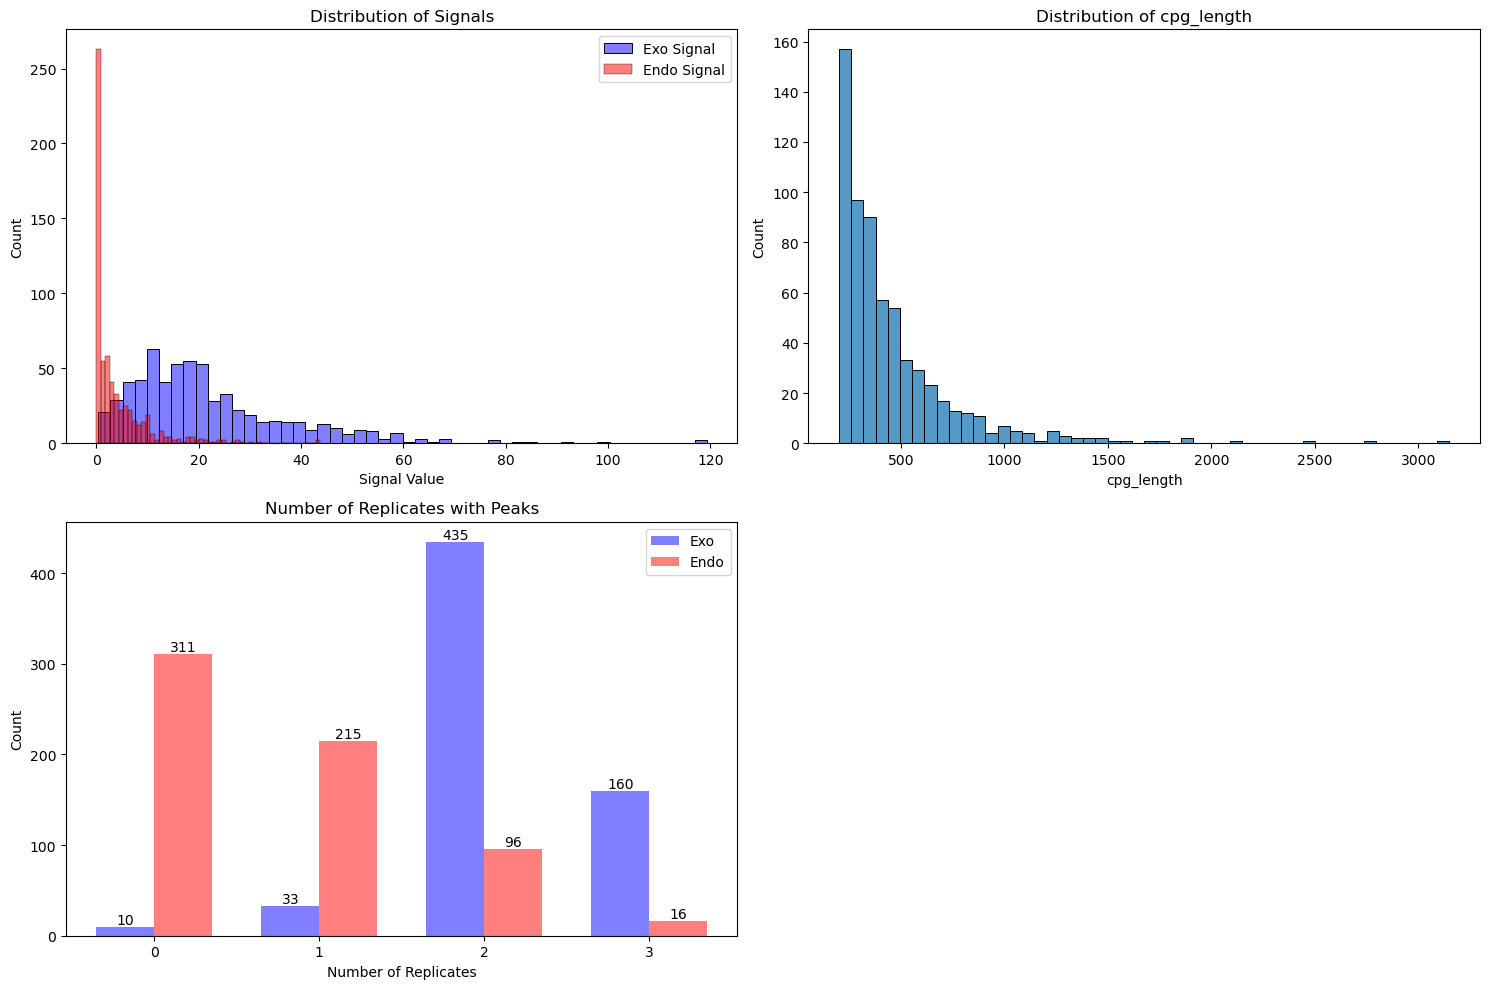

In [94]:
# Distribution plots
plt.figure(figsize=(15, 10))

# Plot overlapped signal distributions
plt.subplot(2, 2, 1)
sns.histplot(data=exo_only_df, x='exo_signal', bins=50, alpha=0.5, label='Exo Signal', color='blue')
sns.histplot(data=exo_only_df, x='endo_signal', bins=50, alpha=0.5, label='Endo Signal', color='red')
plt.title('Distribution of Signals')
plt.xlabel('Signal Value')
plt.ylabel('Count')
plt.legend()

# Plot CpG length distribution
plt.subplot(2, 2, 2)
sns.histplot(data=exo_only_df, x='cpg_length', bins=50)
plt.title('Distribution of cpg_length')
plt.xlabel('cpg_length')
plt.ylabel('Count')

# Count peaks per region
plt.subplot(2, 2, 3)
exo_peak_counts = exo_only_df['exo_replicates_with_peaks'].value_counts()
endo_peak_counts = exo_only_df['endo_replicates_with_peaks'].value_counts()

x = np.arange(max(max(exo_peak_counts.index), max(endo_peak_counts.index)) + 1)
width = 0.35

# Create bars and store them to add labels
exo_bars = plt.bar(x - width/2, [exo_peak_counts.get(i, 0) for i in x], width, label='Exo', color='blue', alpha=0.5)
endo_bars = plt.bar(x + width/2, [endo_peak_counts.get(i, 0) for i in x], width, label='Endo', color='red', alpha=0.5)

# Add count labels on top of each bar
for bars in [exo_bars, endo_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

plt.title('Number of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.legend()

plt.xticks(x, x.astype(int))
plt.tight_layout()
plt.show()

# Endo only

In [95]:
endo_only_df.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
2293,chr11,114786357,114786681,324,1460,CpG:,24.263212,0.559296,43.381714,0.666667,endo_only,exo_only,False,1,2,3,3,"0.0,0.0,72.78963462585284","0.79434080808251,0.8835466732213526,0.0",1,0,6.79768;6.86522,3.38542,114786357,114786681,324,34.313363,0.397155,1.414214,0.710098,2,1
5753,chr19,5082454,5082810,356,623,CpG:,33.525380,1.313008,25.533256,0.666667,endo_only,exo_only,False,1,2,3,3,"0.0,0.0,100.57614110025128","2.913353871763422,1.0256713695740431,0.0",1,0,6.28117;5.69421,5.61625,5082454,5082810,356,47.412048,1.206601,1.414214,0.918959,2,1
10378,chr7,44527968,44528207,239,924,CpG:,25.965753,1.162608,22.334056,0.666667,endo_only,exo_only,False,1,2,3,3,"0.0,77.89725778491926,0.0","0.7500426539816119,2.7377813490863625,0.0",0,0,4.56325;8.57577,4.04494,44527968,44528207,239,36.721119,1.155139,1.414214,0.993576,2,1
3678,chr14,67235403,67236476,1073,1097,CpG:,1.612110,0.086617,18.611860,0.666667,endo_only,endo_only,False,1,2,3,3,"4.836330706008883,0.0,0.0","0.10739887660614042,0.15245321723532698,0.0",0,0,NaN,4.79966;4.7678,67235403,67236476,1073,2.279868,0.063950,1.414214,0.738304,0,2
12269,chr9,107598789,107599151,362,1405,CpG:,17.280947,1.447023,11.942412,0.500000,endo_only,endo_only,False,1,3,3,3,"0.0,51.84283999448323,0.0","1.864059179527325,0.9320112776361118,1.5449988328290907",0,0,5.68791,5.21903;5.28499,107598789,107599151,362,24.438949,0.386762,1.414214,0.267281,1,2
